### Case study on Unsupervised Learning

Dataset used : 'wine.csv'

Objectives: 
    

1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Hierarchical Clustering Method:

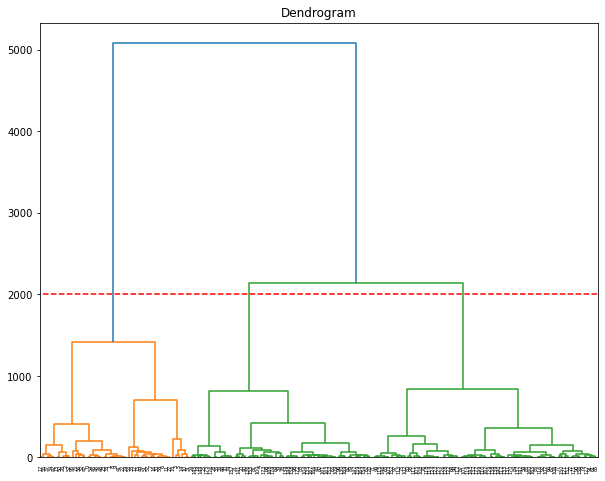

In [12]:
#Dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df, method='ward')

plt.figure(figsize=(10,8))
plt.title('Dendrogram')

dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts='True')

plt.hlines(2000,10,10000, colors='r', linestyle='dashed')

plt.show()


In [13]:
# Horizontal line cuts the dendrogram at 3 points. Therfore no. of clusters can be taken as 3.

In [15]:
#Agglomerative Clustering for 3 clusters
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_agg=cluster.fit_predict(df)
labels_agg

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

K-means clustering

In [19]:
from sklearn.cluster import KMeans

#collecting the values of wcss for different centroids
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state =42)
    #once that instance is ready you can use it for fitting that model
    kmeans.fit(df)
    #calculate wcss with Kmeans.inertia_. Kmeans.inertia will give us wcss value. so we append that value in the list
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\vipin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531862
2370689.686782968
1337029.4929415903
916379.187153917
647326.0020260846
412303.8282508013
323223.24705426674
270954.9292415375
217887.378560333


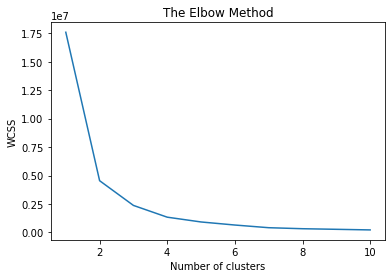

In [20]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

With the help of above Elbow chart we can decide the number of clusters as 3.

In [21]:
#creating the model
#k-means
kmeans =  KMeans(n_clusters = 3, init = 'k-means++',random_state =42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


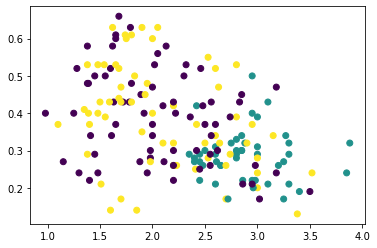

In [26]:
#scatter plotting
Total_Phenols=df["Total_Phenols"]
Nonflavanoid_Phenols=df["Nonflavanoid_Phenols"]
plt.scatter(Total_Phenols,Nonflavanoid_Phenols,c=y_kmeans,label = 'Cluster1')
                    